## **Librerias**

In [4]:
import tensorflow as tf
import os


GPU TEST 🧪🧪

In [3]:
gpus = tf.config.experimental.list_physical_devices("GPU") #Se usa para evitar error por falta de memoria
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## **Creacion Data Set**

## **Entrenamiento Modelo**

### ***Entreno***

In [14]:
def model_Training():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(128, 128, 1)))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Conv2D(16, kernel_size=(3, 3),activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(120, activation='relu'))
    model.add(keras.layers.Dropout(0.5)) 
    model.add(keras.layers.Dense(84, activation='relu'))
    model.add(keras.layers.Dropout(0.5)) 
    model.add(keras.layers.Dense(8, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
checkpoint = ModelCheckpoint('mejor_modelo.keras', monitor='val_loss', save_best_only=True, mode='min')

In [16]:
n_iteraciones = 10 
for i in range(n_iteraciones):
    model = model_Training()
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64, callbacks=[checkpoint])
    

Epoch 1/20


/home/santenana/miniconda3/envs/rayos_x/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1723820084.591736    7098 service.cc:146] XLA service 0x7fc32000b260 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723820084.591819    7098 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti, Compute Capability 8.9
2024-08-16 14:54:44.628141: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-16 14:54:44.774572: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


22/62 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1092 - loss: 26.2496

I0000 00:00:1723820087.052494    7098 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.1276 - loss: 14.3385 - val_accuracy: 0.2469 - val_loss: 1.9929
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2023 - loss: 2.0145 - val_accuracy: 0.2602 - val_loss: 1.9398
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2511 - loss: 1.9457 - val_accuracy: 0.3112 - val_loss: 1.8883
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3215 - loss: 1.7930 - val_accuracy: 0.3163 - val_loss: 1.8159
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3501 - loss: 1.7365 - val_accuracy: 0.3306 - val_loss: 1.8297
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4127 - loss: 1.5936 - val_accuracy: 0.3418 - val_loss: 1.8185
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4634 - loss: 1.5308 - val_accuracy: 0.3612 - val_loss: 1.7933
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5029 - loss: 1.4159 - val_accuracy: 0.3673 - val_loss: 1.7487
E

In [17]:
model.save('mejor_modelo.keras')

In [18]:
mejor_modelo = load_model('mejor_modelo.keras')
resultado = mejor_modelo.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {resultado[0]}')
print(f'Precisión en el conjunto de prueba: {resultado[1]}')

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3697 - loss: 2.1591
Pérdida en el conjunto de prueba: 2.147359848022461
Precisión en el conjunto de prueba: 0.3969387710094452


In [19]:
checkpoint = ModelCheckpoint('mejor_modelo.keras', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True)

In [20]:
n_iteraciones = 20 
model = load_model('mejor_modelo.keras')
for i in range(n_iteraciones):
    # print(f"Entrenamiento #{i+1}")
    model = model_Training()
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, callbacks=[checkpoint])

Epoch 1/20


/home/santenana/miniconda3/envs/rayos_x/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 189ms/step - accuracy: 0.1227 - loss: 15.3471 - val_accuracy: 0.1663 - val_loss: 2.0526
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1540 - loss: 2.0475 - val_accuracy: 0.1969 - val_loss: 1.9935
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2219 - loss: 1.9604 - val_accuracy: 0.2469 - val_loss: 1.9640
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2545 - loss: 1.8925 - val_accuracy: 0.2490 - val_loss: 1.9494
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3008 - loss: 1.8324 - val_accuracy: 0.2786 - val_loss: 1.9214
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3376 - loss: 1.7649 - val_accuracy: 0.3184 - val_loss: 1.8757
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3691 - loss: 1.6838 - val_accuracy: 0.3337 - val_loss: 1.8334
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4143 - loss: 1.5746 - val_accuracy: 0.3347 - val_loss: 

In [21]:
model.save('mejor_modelo.keras')

In [22]:
mejor_modelo = load_model('mejor_modelo.keras')
resultado = mejor_modelo.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {resultado[0]}')
print(f'Precisión en el conjunto de prueba: {resultado[1]}')

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3700 - loss: 2.0660
Pérdida en el conjunto de prueba: 2.04542875289917
Precisión en el conjunto de prueba: 0.3632653057575226


In [23]:
checkpoint = ModelCheckpoint('mejor_modelo.keras', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True)

In [24]:
n_iteraciones = 20 
model = load_model('mejor_modelo.keras')
for i in range(n_iteraciones):
    model = model_Training()
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 30, batch_size=128, callbacks=[checkpoint])

Epoch 1/30


/home/santenana/miniconda3/envs/rayos_x/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.1281 - loss: 18.8012 - val_accuracy: 0.1347 - val_loss: 2.0563
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.1438 - loss: 2.0812 - val_accuracy: 0.1633 - val_loss: 2.0453
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1422 - loss: 2.0742 - val_accuracy: 0.1827 - val_loss: 2.0312
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1589 - loss: 2.0573 - val_accuracy: 0.1816 - val_loss: 2.0355
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1581 - loss: 2.0519 - val_accuracy: 0.1806 - val_loss: 2.0363
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1671 - loss: 2.0443 - val_accuracy: 0.1878 - val_loss: 2.0119
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1671 - loss: 2.0243 - val_accuracy: 0.1898 - val_loss: 2.0156
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1740 - loss: 2.0218 - val_accuracy: 0.1918 - val_loss: 1

In [25]:
model.save('mejor_modelo.keras')

In [26]:
mejor_modelo = load_model('mejor_modelo.keras')
resultado = mejor_modelo.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {resultado[0]}')
print(f'Precisión en el conjunto de prueba: {resultado[1]}')

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3571 - loss: 2.6458 
Pérdida en el conjunto de prueba: 2.6084542274475098
Precisión en el conjunto de prueba: 0.37653061747550964


In [27]:
checkpoint = ModelCheckpoint('mejor_modelo.keras', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True)

In [28]:
n_iteraciones = 20 
model = load_model('mejor_modelo.keras')
for i in range(n_iteraciones):
    model = model_Training()
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 30, batch_size=128, callbacks=[checkpoint])

Epoch 1/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.1315 - loss: 13.4000 - val_accuracy: 0.2469 - val_loss: 2.0130
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.2186 - loss: 1.9941 - val_accuracy: 0.2776 - val_loss: 1.9209
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2817 - loss: 1.8568 - val_accuracy: 0.3173 - val_loss: 1.8392
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3434 - loss: 1.7494 - val_accuracy: 0.3388 - val_loss: 1.8298
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3555 - loss: 1.7106 - val_accuracy: 0.3510 - val_loss: 1.8017
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4384 - loss: 1.5422 - val_accuracy: 0.3622 - val_loss: 1.7683
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4743 - loss: 1.4744 - val_accuracy: 0.3755 - val_loss: 1.7614
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5149 - loss: 1.3677 - val_accuracy: 0.3776 - 

In [29]:
model.save('mejor_modelo.keras')

In [30]:
mejor_modelo = load_model('mejor_modelo.keras')
resultado = mejor_modelo.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {resultado[0]}')
print(f'Precisión en el conjunto de prueba: {resultado[1]}')
checkpoint = ModelCheckpoint('mejor_modelo.keras', monitor='val_accuracy', save_best_only=True, mode='max')

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3894 - loss: 2.6336 
Pérdida en el conjunto de prueba: 2.643645763397217
Precisión en el conjunto de prueba: 0.3948979675769806


### ***Validacion***

In [31]:
model = model_Training()
# model.summary()

In [32]:
mejor_modelo = load_model('mejor_modelo.keras')

In [33]:
loss, accuracy = mejor_modelo.evaluate(X_test, y_test, verbose=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3894 - loss: 2.6336 


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


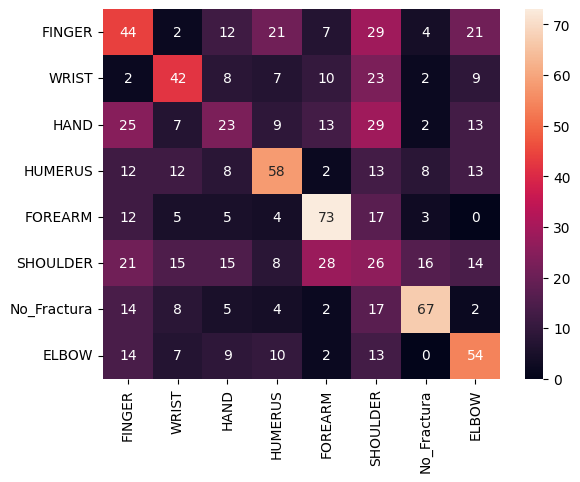

In [34]:
y_pred = mejor_modelo.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) 
y_test_classes = y_test
labels = list(set(y_label))
cm = confusion_matrix(y_test_classes, y_pred_classes)
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d",xticklabels=labels, yticklabels=labels)

In [35]:
def Train_test_plot(historia_model): 
    plt.subplot(2, 1, 1)
    plt.plot(historia_model.history['accuracy'])
    plt.plot(historia_model.history['val_accuracy'])
    plt.title("Modelo de accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'], loc = 'upper left')

    plt.subplot(2, 1, 2)
    plt.plot(historia_model.history['loss'])
    plt.plot(historia_model.history['val_loss'])
    plt.title("Modelo de Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.tight_layout() 
    plt.show()

Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8203 - loss: 0.5588 - val_accuracy: 0.3796 - val_loss: 2.7567
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8082 - loss: 0.6015 - val_accuracy: 0.3663 - val_loss: 2.4921
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8340 - loss: 0.5735 - val_accuracy: 0.3592 - val_loss: 2.6457
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7928 - loss: 0.6907 - val_accuracy: 0.3745 - val_loss: 2.4812
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8328 - loss: 0.5500 - val_accuracy: 0.3816 - val_loss: 2.6783
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8391 - loss: 0.5122 - val_accuracy: 0.3816 - val_loss: 2.3055
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8579 - loss: 0.4897 - val_accuracy: 0.3847 - val_loss: 2.6744
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8610 - loss: 0.4568 - val_accuracy: 0

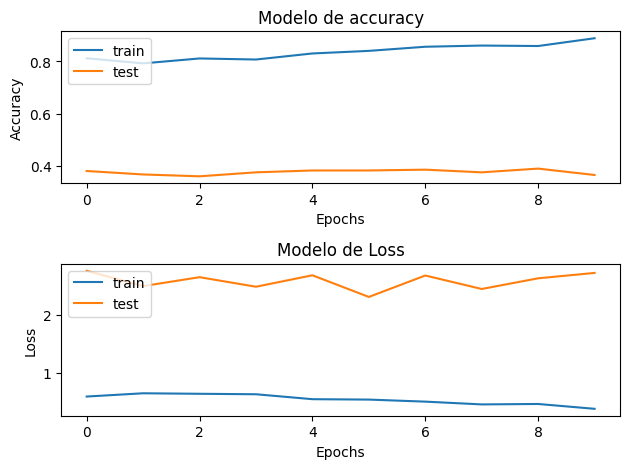

In [36]:
modelo = load_model('mejor_modelo.keras')
historia_model = modelo.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)
Train_test_plot(historia_model)

### ***Prediccion***

In [37]:
from tensorflow.keras.preprocessing import image

def prediction(path):
    img = image.load_img(path,color_mode="grayscale", target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0 
    predictions = model.predict(img_array)
    predicted_class = int(np.argmax(predictions, axis=-1))
    # predicted_class
    if predicted_class==0:
        label_predict  ='ELBOW'
    elif predicted_class==1:
        label_predict = 'FINGER'
    elif predicted_class==2:
        label_predict = 'FOREARM'
    elif predicted_class==3:
        label_predict = 'HAND'
    elif predicted_class==4:
        label_predict = 'HUMERUS'
    elif predicted_class==5:
        label_predict = 'No_Fractura'
    elif predicted_class==6:
        label_predict = 'SHOULDER'
    elif predicted_class==7:
        label_predict = 'WRIST'
    return label_predict, predicted_class

In [38]:
img_path = '/home/santenana/EspecializacionIA/Bimestre05/proyecto_final/Fractura_NO/XR_ELBOW_patient00011_study1_negative_image1.png'
prediction(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


/tmp/ipykernel_1370/1089043916.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(np.argmax(predictions, axis=-1))


('No_Fractura', 5)

## **Modelo Mobile-Net**

In [16]:
def procesar_imagenes_2(rutas_imagenes):
    X = []
    for ruta in rutas_imagenes:
        imagen = cv2.imread(ruta, cv2.IMREAD_COLOR)
        imagen_resized = cv2.resize(imagen, (224, 224))
        X.append(imagen_resized)
    X = np.array(X)
    return X

In [17]:
X_2 = procesar_imagenes_2(X_path)

In [18]:
y_label_2 = np.array(y_label).reshape(-1, 1)
encoder=OneHotEncoder(sparse_output=False)
label_2=encoder.fit_transform(y_label_2)

In [19]:
unique_mapping = dict(zip(y_label, label_2))
unique_mapping

{'SHOULDER': array([0., 0., 0., 0., 0., 0., 1., 0.]),
 'WRIST': array([0., 0., 0., 0., 0., 0., 0., 1.]),
 'FOREARM': array([0., 0., 1., 0., 0., 0., 0., 0.]),
 'ELBOW': array([1., 0., 0., 0., 0., 0., 0., 0.]),
 'FINGER': array([0., 1., 0., 0., 0., 0., 0., 0.]),
 'HUMERUS': array([0., 0., 0., 0., 1., 0., 0., 0.]),
 'HAND': array([0., 0., 0., 1., 0., 0., 0., 0.]),
 'No_Fractura': array([0., 0., 0., 0., 0., 1., 0., 0.])}

In [20]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, label_2, test_size=0.2, random_state=42)

In [21]:
import tf_keras
IMAGE_SHAPE = (224, 224)

In [22]:
MNet_V2 = tf.keras.applications.MobileNetV2
model = MNet_V2()
# model.summary()

In [45]:
# url =  "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [23]:
model = tf_keras.Sequential([hub.KerasLayer(hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", input_shape=IMAGE_SHAPE+(3,)) , input_shape=IMAGE_SHAPE+(3,))])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
Total params: 2257984 (8.61 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [24]:
print(X_train_2.shape)
print(y_train_2.shape)

(644, 224, 224, 3)
(644, 8)


In [25]:
model_fractura = tf_keras.Sequential([hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", input_shape=IMAGE_SHAPE+(3,)) ])
model_fractura.add(tf_keras.layers.Dense(8))
model_fractura.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 8)                 10248     
                                                                 
Total params: 2268232 (8.65 MB)
Trainable params: 10248 (40.03 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [26]:
model_fractura.compile(optimizer='Adam', loss=tf_keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['acc'],run_eagerly=True)

In [27]:
checkpoints = ModelCheckpoint('mejor_modelo_mobilne.keras', monitor='val_loss', save_best_only=True, mode='min')

In [51]:
# tf.config.run_functions_eagerly(False)
# n_iteraciones = 10 
# for i in range(n_iteraciones):
#     model_fractura.fit(X_train_2, y_train_2, validation_data=(X_test_2, y_test_2), epochs=20, batch_size=64)

In [28]:
tf.config.run_functions_eagerly(False)

In [30]:
hst = model_fractura.fit(X_train_2, y_train_2, 
                        validation_data=(X_test_2, y_test_2), 
                        epochs=15,
                        batch_size=64)

Epoch 1/15
11/11 [==============================] - 11s 864ms/step - loss: 2.1431 - acc: 0.1894 - val_loss: 1.8409 - val_acc: 0.2609
Epoch 2/15
11/11 [==============================] - 9s 815ms/step - loss: 1.7639 - acc: 0.3354 - val_loss: 1.7231 - val_acc: 0.3478
Epoch 3/15
11/11 [==============================] - 9s 824ms/step - loss: 1.6117 - acc: 0.3975 - val_loss: 1.6471 - val_acc: 0.3975
Epoch 4/15
11/11 [==============================] - 9s 823ms/step - loss: 1.5077 - acc: 0.4363 - val_loss: 1.6082 - val_acc: 0.3851
Epoch 5/15
11/11 [==============================] - 9s 815ms/step - loss: 1.4025 - acc: 0.5016 - val_loss: 1.5685 - val_acc: 0.4907
Epoch 6/15
11/11 [==============================] - 9s 820ms/step - loss: 1.3768 - acc: 0.5062 - val_loss: 1.5310 - val_acc: 0.4969
Epoch 7/15
11/11 [==============================] - 9s 824ms/step - loss: 1.3038 - acc: 0.5543 - val_loss: 1.5268 - val_acc: 0.4969
Epoch 8/15
11/11 [==============================] - 9s 814ms/step - loss: 1

In [36]:
model_fractura.save('mejor_modelo_Mobilnet.h5')

/home/santenana/miniconda3/envs/rayos_x/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import custom_object_scope

In [38]:
# with custom_object_scope({'KerasLayer': YourCustomLayer}): 
#     mejor_modelo = load_model('./mejor_modelo_Mobilnet.h5')

In [39]:
# mejor_modelo_fractura = load_model('mejor_modelo_Mobilnet.h5')
# resultado = mejor_modelo_fractura.evaluate(X_test_2, y_test_2)
# print(f'Pérdida en el conjunto de prueba: {resultado[0]}')
# print(f'Precisión en el conjunto de prueba: {resultado[1]}')

In [ ]:
# history = model_fractura.fit(X_train_2,y_train_2, epochs =10 ,batch_size=128,validation_data=(X_test_2,y_test_2),callbacks=[checkpoints])

### **Pytorch**

In [40]:
def procesar_imagenes_2(rutas_imagenes):
    X = []
    for ruta in rutas_imagenes:
        imagen = cv2.imread(ruta, cv2.IMREAD_COLOR)
        imagen_resized = cv2.resize(imagen, (224, 224))
        X.append(imagen_resized)
    X = np.array(X)
    return X

In [41]:
X_3 = procesar_imagenes_2(X_path)

In [42]:
y_label_3 = np.array(y_label).reshape(-1, 1)
encoder=OneHotEncoder(sparse_output=False)
label_3=encoder.fit_transform(y_label_3)

In [43]:
unique_mapping = dict(zip(y_label, label_3))
unique_mapping

{'SHOULDER': array([0., 0., 0., 0., 0., 0., 1., 0.]),
 'WRIST': array([0., 0., 0., 0., 0., 0., 0., 1.]),
 'FOREARM': array([0., 0., 1., 0., 0., 0., 0., 0.]),
 'ELBOW': array([1., 0., 0., 0., 0., 0., 0., 0.]),
 'FINGER': array([0., 1., 0., 0., 0., 0., 0., 0.]),
 'HUMERUS': array([0., 0., 0., 0., 1., 0., 0., 0.]),
 'HAND': array([0., 0., 0., 1., 0., 0., 0., 0.]),
 'No_Fractura': array([0., 0., 0., 0., 0., 1., 0., 0.])}

In [44]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, label_3, test_size=0.2, random_state=42)

In [45]:
import tf_keras
IMAGE_SHAPE = (224, 224)